Entrenando con el dataset Iris, Red: [4,4,3]
Epoch 000: Loss = 2.1430 | Train Acc = 30.83% | Test Acc = 26.67% | Time =  1187.59 secs
Epoch 001: Loss = 2.1092 | Train Acc = 32.50% | Test Acc = 30.00% | Time =  1180.84 secs
Epoch 002: Loss = 1.9882 | Train Acc = 35.00% | Test Acc = 30.00% | Time =  1187.59 secs
Epoch 003: Loss = 1.9467 | Train Acc = 35.83% | Test Acc = 33.33% | Time =  1188.31 secs
Epoch 004: Loss = 1.8614 | Train Acc = 38.33% | Test Acc = 26.67% | Time =  1177.52 secs
Epoch 005: Loss = 1.8000 | Train Acc = 38.33% | Test Acc = 26.67% | Time =  1174.09 secs
Epoch 006: Loss = 1.8012 | Train Acc = 31.67% | Test Acc = 26.67% | Time =  1175.73 secs
Epoch 007: Loss = 1.7588 | Train Acc = 32.50% | Test Acc = 30.00% | Time =  1174.54 secs
Epoch 008: Loss = 1.7023 | Train Acc = 35.00% | Test Acc = 33.33% | Time =  1173.27 secs
Epoch 009: Loss = 1.6602 | Train Acc = 36.67% | Test Acc = 33.33% | Time =  1156.69 secs
Epoch 010: Loss = 1.6162 | Train Acc = 35.83% | Test Acc = 36.67%

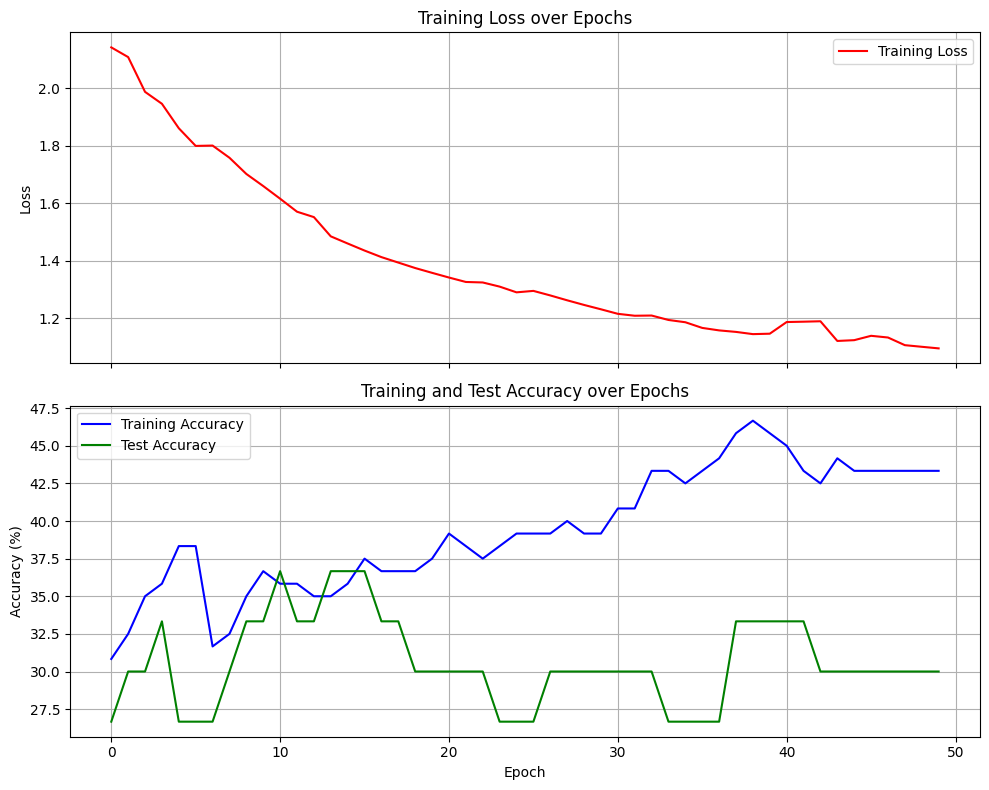

In [4]:
%run src/train_kan_iris

Entrenando con el dataset Iris, Red: [4, 2, 3]
Entrenando capas internas
Entrenando capas externas
Entrenando capas internas
Entrenando capas externas
Epoch 000: Loss = 1.5276 | Train Acc = 39.17% | Test Acc = 40.00% | Time =  1285.68 secs
Entrenando capas internas
Entrenando capas externas
Entrenando capas internas
Entrenando capas externas
Epoch 001: Loss = 1.5046 | Train Acc = 39.17% | Test Acc = 40.00% | Time =  1262.18 secs
Entrenando capas internas
Entrenando capas externas
Entrenando capas internas
Entrenando capas externas
Epoch 002: Loss = 1.4819 | Train Acc = 38.33% | Test Acc = 40.00% | Time =  1266.83 secs
Entrenando capas internas
Entrenando capas externas
Entrenando capas internas
Entrenando capas externas
Epoch 003: Loss = 1.4828 | Train Acc = 39.17% | Test Acc = 43.33% | Time =  1276.16 secs
Entrenando capas internas
Entrenando capas externas
Entrenando capas internas
Entrenando capas externas
Epoch 004: Loss = 1.4555 | Train Acc = 40.83% | Test Acc = 40.00% | Time =  1

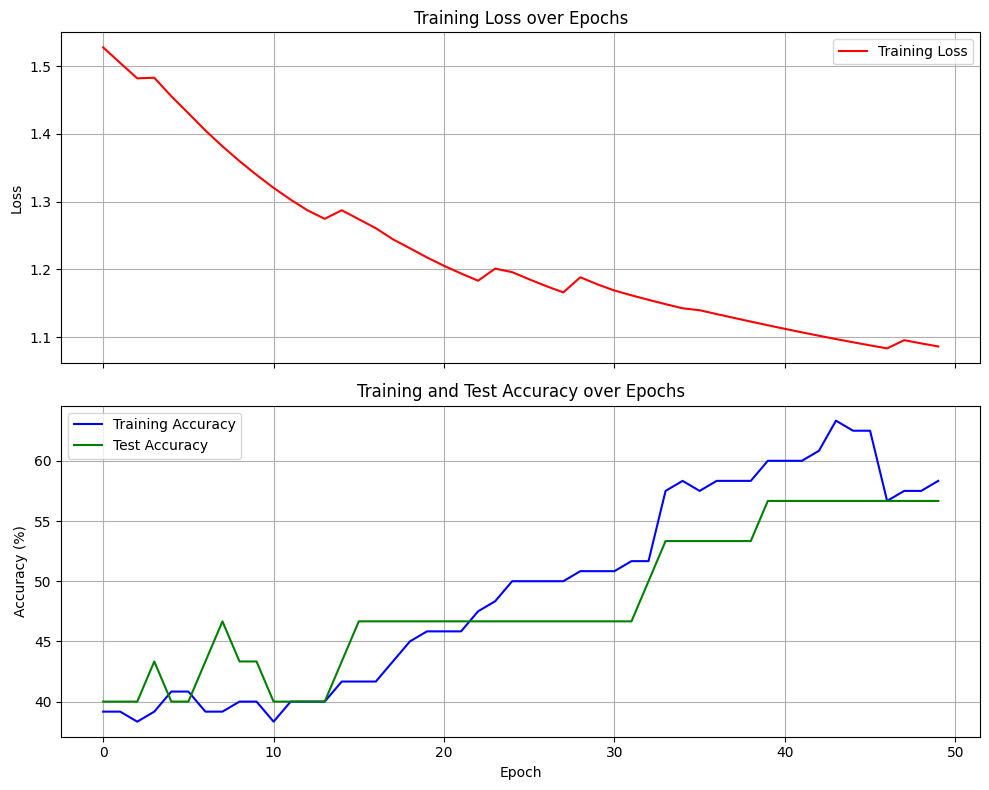

In [9]:
%run src/train_kan_iris

2025-06-06 07:45:54.476072: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 07:45:54.652361: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 07:45:54.809887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749217554.957300    6487 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749217554.998814    6487 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749217555.293916    6487 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Final Training Loss: 0.0936
Final Training Accuracy: 97.50%
Final Test Accuracy: 96.67%


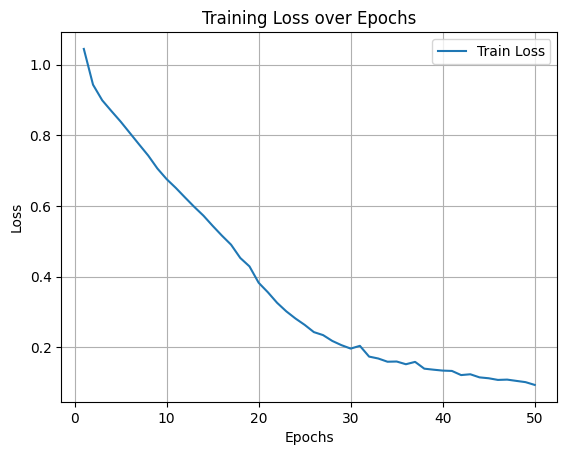

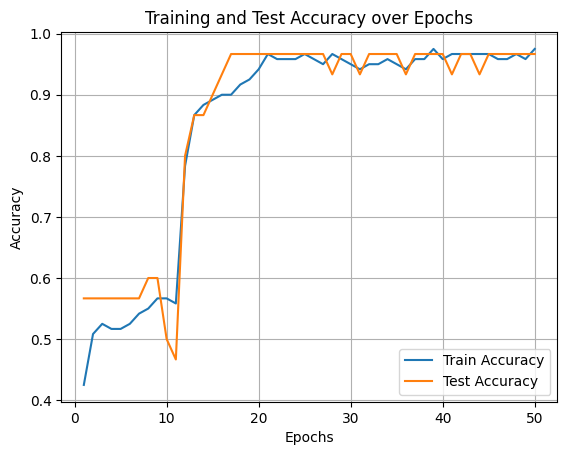

In [1]:
# mlp_iris_keras.py

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Cargar y preparar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding
y_onehot = to_categorical(y)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Callback para registrar tiempo por época
class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.logs = []
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()
    def on_epoch_end(self, epoch, logs=None):
        elapsed = time.time() - self.start_time
        self.logs.append(elapsed)

# Crear el modelo MLP
model = Sequential([
    InputLayer(input_shape=(4,)),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback para tiempos
timing_cb = TimingCallback()

# Entrenamiento
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=16,
                    verbose=0,
                    callbacks=[timing_cb])

# Extraer métricas
epochs = list(range(1, 51))
train_loss = history.history['loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_times = timing_cb.logs

# Mostrar métricas finales
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Test Accuracy: {test_acc[-1]*100:.2f}%")


# Guardar resultados en CSV
df = pd.DataFrame({
    'epoch': epochs,
    'train_loss': train_loss,
    'train_accuracy': train_acc,
    'test_accuracy': test_acc,
    'time': epoch_times
})
df.to_csv('ResultadosMLP_Iris.csv', index=False)

# Graficar loss
plt.figure()
plt.plot(epochs, train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('MLP_Loss.png')
plt.show()

# Graficar accuracy
plt.figure()
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('MLP_Accuracy.png')
plt.show()
